# Color Classifier using Machine Learning
---

In this project, I have used knowledge of computer vision techniques to build a classifier for images!

In this notebook, I have  pre-processed these images, extracted features that will help us distinguish the different types of images, and use those features to classify the colors of images into three classes: red, green, or blue. 


# 1. Loading and Visualizing the Color Dataset

This color dataset consists of  number of color images in 3 categories - red, green, and blue. The dataset consists of 625 images of different colors.



In [222]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

## Training and Testing Data

All 630 images are divided into training and test dataset.

IMAGE_DIR_TRAINING: the directory where our training image data is stored
IMAGE_DIR_TEST: the directory where our test image data is stored

In [223]:
# Image data directories
IMAGE_DIR_TRAINING = "Training/"
IMAGE_DIR_TEST = "Test/"

In [224]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)
print(IMAGE_LIST)


[(array([[[0.8627451 , 0.8509804 , 0.8156863 ],
        [0.8901961 , 0.89411765, 0.8666667 ],
        [0.8901961 , 0.90588236, 0.8784314 ],
        ...,
        [0.8901961 , 0.90588236, 0.8784314 ],
        [0.8901961 , 0.89411765, 0.8666667 ],
        [0.8627451 , 0.8509804 , 0.8156863 ]],

       [[0.8901961 , 0.89411765, 0.8666667 ],
        [1.        , 0.89411765, 0.89411765],
        [1.        , 0.69803923, 0.69803923],
        ...,
        [1.        , 0.69803923, 0.69803923],
        [1.        , 0.89411765, 0.89411765],
        [0.8901961 , 0.89411765, 0.8666667 ]],

       [[0.8901961 , 0.90588236, 0.8784314 ],
        [1.        , 0.69803923, 0.69803923],
        [1.        , 0.        , 0.        ],
        ...,
        [1.        , 0.        , 0.        ],
        [1.        , 0.69803923, 0.69803923],
        [0.8901961 , 0.90588236, 0.8784314 ]],

       ...,

       [[0.8901961 , 0.90588236, 0.8784314 ],
        [1.        , 0.69803923, 0.69803923],
        [1.        ,

# 2. Pre-process the Data

After loading in each image, I have standardized the input and output to a 32x32 pixel image.


In [225]:
# This function takes in an RGB image and return a new, standardized version
def standardize_input(image):
    
      
    standard_im = np.copy(image)
    resized_im = cv2.resize(standard_im,(32, 32))
    
    return resized_im
    

## Standardize the output

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of images (red, green, blue), and set the index of the expected class number to 1. 

Since we have three classes (red, green, and blue), we have imposed an order of: [red value, green value, blue value]. To one-hot encode, say, a green image, we would first initialize an array to [0, 0, 0] and change the middle value (the green value) to 1: [0, 1, 0].


In [226]:

## Given a label - "red", "green", or "blue" - return a one-hot encoded label

# Examples: 
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("green") should return: [0, 1, 0]
# one_hot_encode("blue") should return: [0, 0, 1]

def one_hot_encode(label):
    
    one_hot_encoded = [0,0,0]
    if (label == 'red'):
        one_hot_encoded = [1,0,0]
    elif (label == 'green'):
        one_hot_encoded = [0,1,0]
    elif (label == 'blue'):
        one_hot_encoded = [0,0,1]
    
    return one_hot_encoded


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions which I have defined above to standardize the input and output.

In [227]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

Text(0.5, 1.0, '[1, 0, 0]')

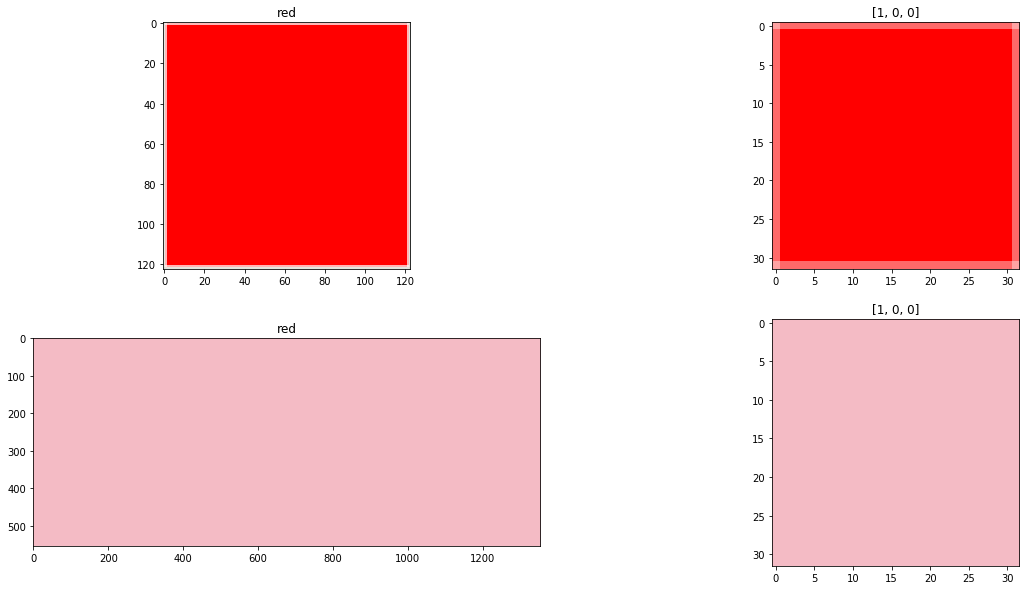

In [228]:
#Displays an original and a standardized image.
f, axarr = plt.subplots(2,2, figsize=(20,10))
axarr[0,0].imshow(IMAGE_LIST[0][0])
axarr[0,0].set_title(IMAGE_LIST[0][1])
axarr[0,1].imshow(STANDARDIZED_LIST[0][0])
axarr[0,1].set_title(STANDARDIZED_LIST[0][1])
axarr[1,0].imshow(IMAGE_LIST[67][0])
axarr[1,0].set_title(IMAGE_LIST[67][1])
axarr[1,1].imshow(STANDARDIZED_LIST[67][0])
axarr[1,1].set_title(STANDARDIZED_LIST[67][1])

# 3. Feature Extraction



Creating a brightness feature that uses RGB color space

 

From this feature, we should be able to estimate an image's label and classify it as either a red, green, or blue. 

In [229]:
## This feature should use RGB colorspace values
def create_feature(test_im):
    feature = []
    #Defining red, green, and blue color spaces and their brightness values
    red = test_im[:,:, 0]
    green = test_im[:,:, 1]
    blue = test_im[:,:, 2]
    
    area = 32*32
    
    brightness_red = np.sum(red[:,:])/area
    brightness_green = np.sum(green[:,:])/area
    brightness_blue = np.sum(blue[:,:])/area
    
    # feature stores the brightness values of red, green, and blue
    feature = [brightness_red, brightness_green, brightness_blue]
    
    return feature

In [230]:
#Example 
image_num = 250
test_im = STANDARDIZED_LIST[image_num][0]
create_feature(test_im)


[0.4133199453353882, 0.7906944751739502, 0.8853093385696411]

# 4. Classification


In [231]:

def estimate_label(rgb_image):
    
    ## classify the image and output a one-hot encoded label
    
    average = create_feature(rgb_image)
    threshold = max(average)
    
    predicted_label = []
    
    if average[0] == threshold:
        predicted_label = one_hot_encode('red')
    elif average[1] == threshold:
        predicted_label = one_hot_encode('green')
    elif average[2] == threshold:
        predicted_label = one_hot_encode('blue')
    else:
        print('label not found')
    return predicted_label

## Testing the classifier


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function which is defined above, and then **shuffle** it.


In [232]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Comparing the output of classification algorithm with the true labels and determining the accuracy.


In [233]:

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.9572192513368984
Number of misclassified images = 16 out of 374
